In [22]:
#Use a recurrent neural network called Long short term memory (LSTM) to predict the closing stock price of a company using the past 60 day stock price

In [23]:
#import libraries
import math
from pandas_datareader import data as pdr
#import pandas_datareader as pdr
import yfinance as yfin
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

yfin.pdr_override()

In [24]:
#get the stock quote
start = '2012-01-01'
#end = '2019-12-17'
end = date.today().strftime("%Y-%m-%d")

df = pdr.get_data_yahoo('AAPL', start=start, end=end)
#df = pdr.DataReader('AAPL', data_source='yahoo', start=start, end=end)

#show dataframe
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482928,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821995,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300
2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.990005,115799700


In [25]:
#get the number ofrows and columns in the data set
df.shape

(2918, 6)

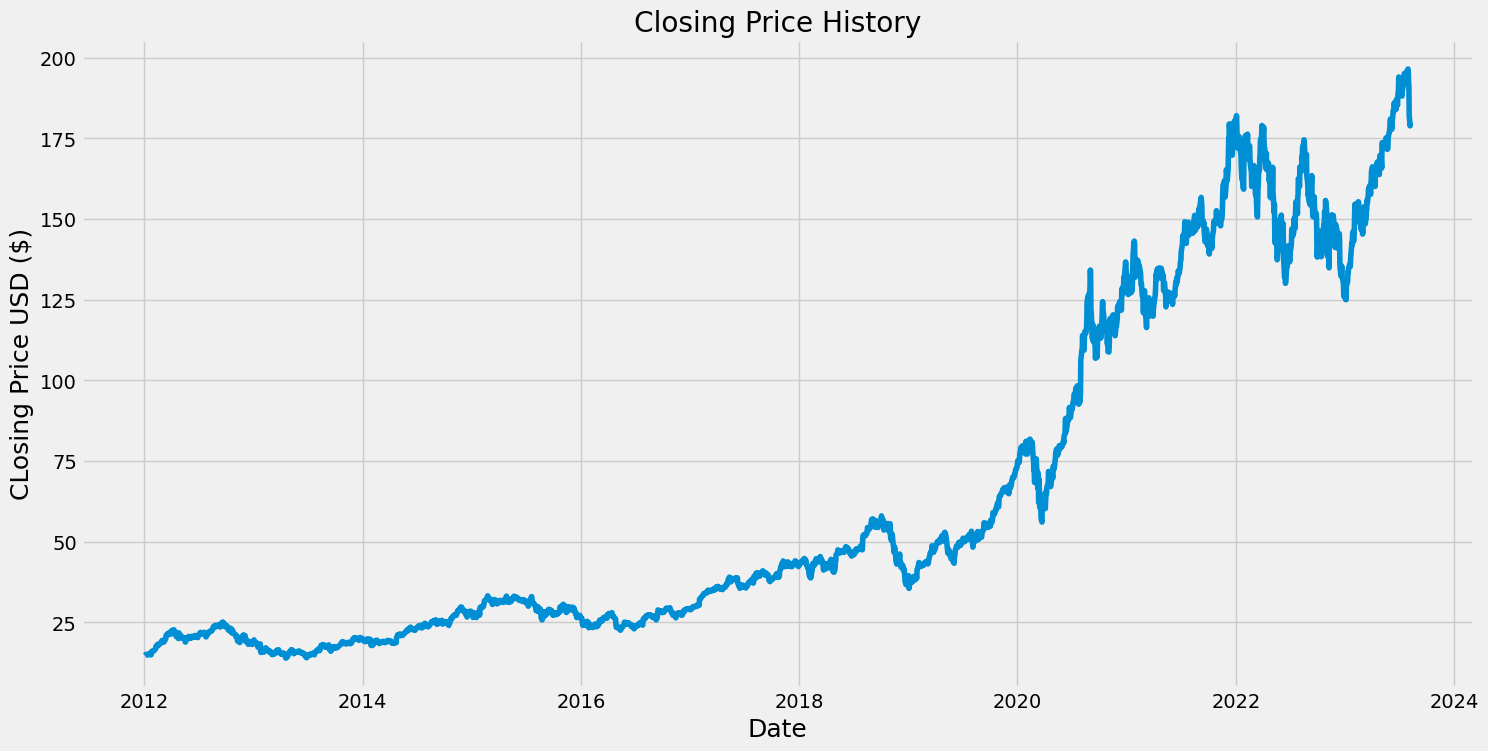

In [26]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLosing Price USD ($)', fontsize=18)
plt.show()

In [27]:
#Create a new datafram with only the 'Close column' 
data = df.filter(['Close'])

#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2335

In [28]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.92076825],
       [0.90356301],
       [0.9087684 ]])

In [29]:
#create the training dataset
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]



In [30]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2275, 60, 1)

In [32]:
#building the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [34]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2275/2275 [==============================] - 20s 8ms/step - loss: 6.9491e-04


In [35]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to  2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [36]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [37]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 0s 6ms/step


In [39]:
#get the root meam squered error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse 

6.579051663236604

C:\Users\Kai\AppData\Local\Temp\ipykernel_10684\1309163991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


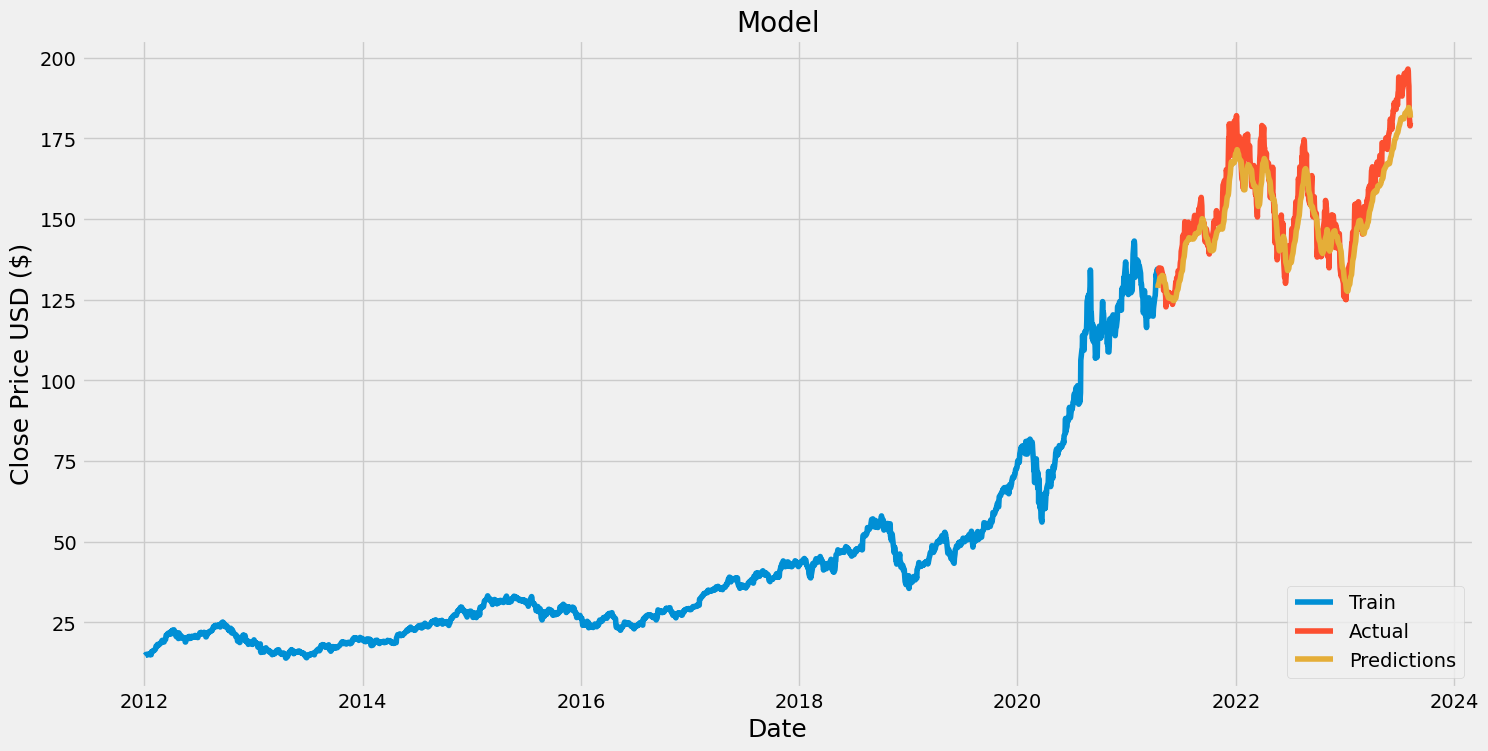

In [40]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [47]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-15,134.500000,128.621597
2021-04-16,134.160004,129.540741
2021-04-19,134.839996,130.326447
2021-04-20,133.110001,131.033096
2021-04-21,133.500000,131.471191
...,...,...
2023-08-02,192.580002,184.527390
2023-08-03,191.169998,184.517731
2023-08-04,181.990005,184.247330


In [51]:
end = date.today().strftime("%Y-%m-%d")

print(end)

2023-08-09


In [55]:
#get the quote
apple_quote = pdr.get_data_yahoo('AAPL', start=start, end="2023-08-01")
#create a new datafram
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and conver the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the pas 60 days
X_test.append(last_60_days_scaled)
#conver the X_test dataset to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) 

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 16ms/step
[[184.21214]]


In [58]:
#get the quote
apple_quote2 = pdr.get_data_yahoo('AAPL', start="2023-08-01", end="2023-08-02")
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-08-01    195.610001
Name: Close, dtype: float64
